In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [113]:
def Data(name, ftype, plotter = None, RangeStart= None, RangeEnd = None, Neutron = None, Spinflip = None, dataN = None, dataSLD = None, Xray = None, dataX = None, dataSLDX = None, Colours = None, Legend = None):
    
    #magref data loaders
    
    plt.figure(figsize = (4.3, 10))
    plt.subplot(2,1,1)
    plt.rc('font', size=17) #font size global
    
    for i in range(39, 41): 
        if Neutron == True:
            
            if (i % 2) == 0:
                
                data_u = np.loadtxt(dataN + str(i).zfill(3) + str('.dat') , skiprows = 3) #Up channel raw data
                
                print(i)
                
                x_u = data_u[:,0]
                simu_data_u= data_u[:,1]
                raw_data_u= data_u[:,2]
                error_data_u = data_u[:,3]
                
                plt.errorbar(x_u, raw_data_u, yerr = error_data_u, fmt = '.', alpha=0.5, capsize = 1.0, capthick = 1, elinewidth = 0.1, linewidth = 0,
                    c=('red'), label = 'Neutron data')
                
                plt.plot(x_u, simu_data_u, linewidth = 1.5, alpha =1, linestyle = '-', c=[(i/RangeEnd),0,(i/RangeEnd)], label = 'Fit ++')
                
            elif (i % 2)!=0:
                
                data_d = np.loadtxt(dataN + str(i).zfill(3) + str('.dat') , skiprows = 3)
                print(i)
                    
                x_d = data_d[:,0]
                simu_data_d= data_d[:,1]
                raw_data_d= data_d[:,2]
                error_data_d = data_d[:,3]
                
                plt.errorbar(x_d, raw_data_d, yerr = error_data_d, fmt='.',alpha =0.5, capsize = 1.0, capthick = 1, elinewidth = 0.1, linewidth = 0,
                    c=('blue'))
                            
                plt.plot(x_d, simu_data_d, linewidth = 1.5, alpha = 1, linestyle = '-', c=[0.3,((i-1)/RangeEnd),((i-1)/RangeEnd)], label = 'Fit --', )
        
                #plt.xlim(min(x_d) - (x_d[1] - x_d[0]) ,max(x_d + (x_d[1] - x_d[0])))
                
            else:
                None
    
        else:
            None
    
    
    if Xray == True:  #loads x-ray data
        
        data_x = np.loadtxt(dataX , skiprows = 3)
        data_SLDX = np.loadtxt(dataSLDX ,dtype = np.complex128, skiprows = 5)
            
        
        x_x = data_x[:,0]
        simu_data_x= data_x[:,1]
        raw_data_x= data_x[:,2]
        error_data_x = data_x[:,3]
        
        plt.errorbar(x_x, raw_data_x, yerr = error_data_x, fmt='.', capsize = 1.0, alpha = 0.5, capthick = 1, elinewidth = 1, linewidth = 0,
            color = 'green', label = 'X-ray data')
    
        plt.plot(x_x, simu_data_x, linewidth = 1.5, linestyle = '-', alpha =1, color = 'm', label = 'X-ray fit' )
        #plt.xlim(min(x_x) - (x_x[1] - x_x[0]) ,max(x_x + (x_x[1] - x_x[0])))
    elif Xray == None:
        print('No X-ray data.')
        
    if Neutron == True:
        if Xray == True:
            plt.xlim(min(x_x) - (x_x[1] - x_x[0]) ,0.15)#max((x_x)/3.5)) #+ ((x_x[1] - x_x[0])/3.5)))
        else:
            None
    else:
        None    
    
    #plt.title('K3 Reflectivity fit at 300K and 250 mT')
    plt.yscale('log')
    plt.ylabel('R')
    plt.ylim( 1e-5 ,1)
    plt.xlim(0.01,0.1)
    #plt.xlabel('Q')

    plt.grid(False)
    #plt.legend(loc='upper right')
    
    plt.subplot(2,1,2)

    ######SLD PLOTTING######
    
    
    
    
    if Xray == True:
        
        if plotter == 'Specnx':
            
            
            z_x = data_SLDX[:,0]
            nb_x = data_SLDX[:,2]
            Ib_x = data_SLDX[:,1]
            
            #plt.plot(z_x, nb_x, linewidth = 1.0, linestyle = '-', color = 'b', label = 'X-SLD')
        
        if plotter == 'Magref':
            
            z_x = data_SLDX[:,0]
            nb_x = data_SLDX[:,5]
            Ib_x = data_SLDX[:,3]
            

                
        plt.plot(z_x, nb_x, linewidth = 1.0, linestyle = '-', color = 'b', label = 'X-SLD')
        plt.plot(z_x, Ib_x, linewidth = 1.0, linestyle = '-', color = 'm', label = 'I-SLD')
        
        
        plt.xlim((min(z_x)-20),(max(z_x)+100))
    else:
        None
        
    if Neutron == True:
        
        
        if Spinflip == True:
            
            for x in my_range(RangeStart, RangeEnd): 
                
                #print(i)
                
                if plotter == 'Specnx':

                    data_SLD = np.loadtxt(dataSLD + str(i).zfill(3) + str('.dat') ,dtype = np.complex128, skiprows = 5)
    
                    z = data_SLD[:,0]
                    nb = data_SLD[:,2]
                    mb = data_SLD[:,3]
                
                zero = np.zeros(len(z))
                
                plt.plot(z, nb, linewidth = 1.0, linestyle = '-', color = 'r', label = 'N-SLD') 
                plt.plot(z, (10*mb), linewidth = 1.0, linestyle = '-', c=np.random.rand(3,), label = 'Magnetic SLD')
                plt.plot(z, zero, linewidth = 0.5, linestyle = '-', color = 'black')
        
                plt.ylabel('SLD (fm/$\AA^3$ , $\mu _b$/$\AA^3$)')
                plt.xlim((min(z)-20),(max(z)+50))
                    
            
        else:
        
            if (RangeEnd % 2) == 0:
                R = int(RangeEnd/2)
            else:
                R = int((RangeEnd -1)/2)
                
            stra = np.array(['a' for i in range(RangeEnd)], dtype =object)
            stra2 = np.array(['a' for i in range(RangeEnd)], dtype =object)
            #print(stra)
            
            
#        for x in my_range(R1, R2, 4):
            for i in range(RangeStart,RangeEnd,2):# for i=0:3:30

                 if plotter == 'Specnx':
                    
                    print(i)
                    #print(RangeStart)
                    
                    

                    data_SLD = np.loadtxt(dataSLD + str((i)).zfill(3) + str('.dat') ,dtype = np.complex128, skiprows = 5)
                    
                    z = data_SLD[:,0]
                    nb = data_SLD[:,2]
                    mb = data_SLD[:,3]
                    
                    #print(i-RangeStart)
                    
                    stra2[i-RangeStart] = plt.plot(z, (mb*8), linewidth = 2.0, linestyle = '-', color = Colours[i-RangeStart])
                    #globals()["w" + str(i-RangeStart)] = plt.plot(z, (mb*8), linewidth = 2.0, linestyle = '-', color = Colours[i-RangeStart])#, label = Legend[i-RangeStart])#[1,(0.5+(i/(2*RangeEnd))),0.5])#, c=np.random.rand(3,), label = 'Magnetic SLD')
                    stra[i-RangeStart] = mlines.Line2D([], [], color=Colours[i-RangeStart])
                    #globals()["wp" + str(i-RangeStart)] = mlines.Line2D([], [], color=Colours[i-RangeStart])
            
                 elif plotter == 'Magref':
                    
                    print ('dataSLD' + str(2*(i+1)).zfill(3) + str('.dat'))

                    data_SLD = np.loadtxt(dataSLD + str(2*(1+i)).zfill(3) + str('.dat') ,dtype = np.complex128, skiprows = 5)
    
                    z = data_SLD[:,0]
                    nb = data_SLD[:,1]
                    mb = data_SLD[:,2]
                    
                    stra2[i-RangeStart] = plt.plot(z, (mb*8), linewidth = 2.0, linestyle = '-', color = Colours[i-RangeStart])
                    #globals()["w" + str(i-RangeStart)] = plt.plot(z, (mb*8), linewidth = 2.0, linestyle = '-', color = Colours[i-RangeStart])#, label = Legend[i-RangeStart])#[1,(0.5+(i/(2*RangeEnd))),0.5])#, c=np.random.rand(3,), label = 'Magnetic SLD')
                    stra[i-RangeStart] = mlines.Line2D([], [], color=Colours[i-RangeStart])
                
                     
                 else:
                    None
        
            zero = np.zeros(len(z)) #creates array of zeros of lenght Z to plot x axis
        
        
        NSLD = plt.plot(z, nb, linewidth = 4.0, linestyle = '-', color = 'black') 
        NSLDp = mlines.Line2D([], [], color = 'black', lw = 5)
        #plt.plot(z, (10*mb), linewidth = 1.0, linestyle = '-', c=np.random.rand(3,), label = 'Magnetic SLD')
        plt.plot(z, zero, linewidth = 0.5, linestyle = '-', color = 'black')
        
        #plt.ylabel('SLD (fm/$\AA^3$ , $\mu _b$/$\AA^3$)')
        plt.xlim((min(z)-0),(max(z+170)))
    else:
        plt.ylabel('SLD (fm/$\AA^3$)')
    
    if Neutron == True:
        if Xray == True:
            plt.xlim((min(z)+10),(max(z)+10))
            plt.ylim(-0.3,2)
        else:
            None
    else:
        None
    print(stra)
    #plt.xlabel('z($\AA$)')
    #plt.legend(loc='upper left')
    plt.grid(False)
    plt.legend([NSLDp,stra[0],stra[12],stra[10],stra[8],stra[6],stra[4],stra[2]],['N-SLD','2.2T','-0.9T','-0.75T','-0.65T','-0.55T','-0.4T','-0.12T'], loc = 'upper right', frameon = False,bbox_to_anchor=(1.03, 1))
    
    plt.savefig('plot_' + str(name) + str(ftype), dpi = 800, transparent = True)    
    plt.show()
    
    return None 

39
40
['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']
39
41
43
45
47
49
51


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\

[<matplotlib.lines.Line2D object at 0x000001E8D7FBAD90> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D7EF9EE0> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D691E730> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D8045EB0> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D7D76640> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D7E19C10> 'a'
 <matplotlib.lines.Line2D object at 0x000001E8D7E191F0> 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']


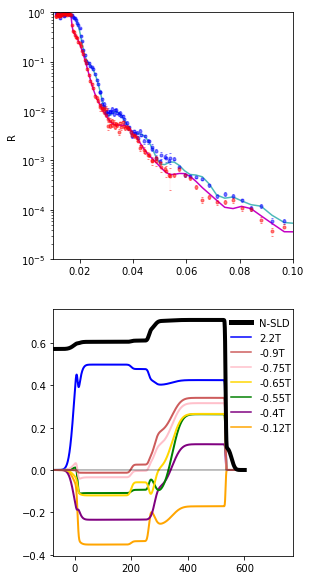

In [114]:
Colours = ['blue','blue','orange','orange','purple','purple','green','green','Gold','Gold','pink','pink','indianred','indianred'] #array for choosing SLD plotting colours
Data('SC40','.svg','Specnx',39,52,True,False,'Data','SLD', False, 'Data000.dat', 'SLD000.dat',Colours)



In [3]:
plt.figure(figsize = (8., 8))
plt.subplot(2,1,1)


data_u = np.loadtxt('CoFe2O4_magref_N_data000.dat' , skiprows = 3) #Up channel raw data
data_d = np.loadtxt('CoFe2O4_magref_N_data001.dat' , skiprows = 3) 

#data_u_Ni = np.loadtxt('NiFe2O4_magref_N_data000.dat' , skiprows = 3) #Up channel raw data
#data_d_Ni = np.loadtxt('NiFe2O4_magref_N_data001.dat' , skiprows = 3) 

#data_u_Fe = np.loadtxt('MgO_Fe3O4_mageref_N_data000.dat' , skiprows = 3) #Up channel raw data
#data_d_Fe = np.loadtxt('MgO_Fe3O4_mageref_N_data000.dat' , skiprows = 3)

x_u = data_u[:,0]
simu_data_u= data_u[:,1]
raw_data_u= data_u[:,2]
error_data_u = data_u[:,3]

x_d = data_d[:,0]
simu_data_d= data_d[:,1]
raw_data_d= data_d[:,2]
error_data_d = data_d[:,3]

def plot(data,SF):
    plt.errorbar(data[:,0], SF*data[:,2], yerr = data[:,3], fmt = '.', alpha=0.5, capsize = 1.0, capthick = 1, elinewidth = 0.1, linewidth = 0,
                    c=('b'), label = '++/--')
    plt.plot(data[:,0], SF*data[:,1], linewidth = 1.5, linestyle = '-', c='r', label = 'Fit')
    
    return None 
    
plot(data_u_Ni,40)
plot(data_d_Ni,40)
plot(data_u,40)
plot(data_d,40)
plot(data_u_Fe,1)
plot(data_d_Fe,1)
#####################################################    



plt.yscale('log')
plt.ylabel('R')
plt.ylim( 1e-4 ,1.3)
plt.xlabel('Q')

plt.grid('false')
plt.legend(loc='upper right')
    
plt.subplot(2,1,2)

################################################################################
#data_SLD = np.loadtxt('CoFe2O4_magref_N_SLD000.dat' ,dtype = np.complex128, skiprows = 5)
#data_SLD1 = np.loadtxt('NiFe2O4_magref_N_SLD000.dat' ,dtype = np.complex128, skiprows = 5)
#data_SLD2 = np.loadtxt('MgO_Fe3O4_mageref_N_SLD000.dat' ,dtype = np.complex128, skiprows = 5)
data_SLD3 = np.loadtxt('Ni-CoFe2O4_magref_N_SLD004.dat' ,dtype = np.complex128, skiprows = 5)


#zero = np.zeros(len(z))

def plotSLD(data,SF,label, colour):
    plt.plot(data[:,0], data[:,1].real, linewidth = 1.0, linestyle = '-', color = colour, label = label)
    plt.plot(data[:,0], (SF*data[:,2].real), linewidth = 1.0, linestyle = '-', c=np.random.rand(3,), label = label +'MSLD')
    
    return None
def plotSLDsn(data,SF, label,colour):
    plt.plot(data[:,0], data[:,2].real, linewidth = 1.0, linestyle = '-', color = colour, label = label)
    plt.plot(data[:,0], (SF*data[:,3].real), linewidth = 1.0, linestyle = '-', c=np.random.rand(3,), label = label +'MSLD')
    
    return None
        

#plotSLD(data_SLD,5, 'CoFe$_2$O$_4$ ', 'b')
#plotSLD(data_SLD1,5, 'NiFe$_2$O$_4$ ','g')
#plotSLD(data_SLD2,5,  'Fe$_3$O$_4$ ','r')
plotSLDsn(data_SLD3,2, 'CoFe$_2$O$_4$/NiFe$_2$O$_4$ ', 'purple' )

plt.ylabel('SLD (fm/$\AA^3$ , $\mu _b$/$\AA^3$)')
plt.xlim((-20),1000)
plt.ylim(0,1)

plt.xlabel('z($\AA$)')
plt.legend(loc='upper right')
plt.grid(False)
    
#plt.savefig('single_films_Ni_Co_Fe.png', dpi = 800)    
plt.show()

NameError: name 'plt' is not defined